# What Makes the Best Defensive Footballers?
**Analyzing player attributes from FIFA '17 player rankings.**

Author: Brian Daisey

## Introduction

Look at the defense, unsung heroes, yada, yada

### Libraries Used

- Pandas
- Numpy
- Matplotlib - pyplot
- Skikit-learn (which parts)

### Outline

1. Getting Started
  - 1.1 Dataset Source
  - 1.2 Load and View Data
  - 1.3 Isolate Top 1000 Players
  - 1.4 Isolate Defenders
2. Explore Top 1000 Players
  - 2.1 Top 1000 Player Breakdown by Position 
  - 2.2 How Many Defenders in Top 1000?
3. Explore Defenders
  - 3.1 Defenders by Position (Histogram)
  - 3.2 Defenders by Rating (Histogram)
4. Begin Defender Analysis
  - 4.1 Selection of Attributes 
  - 4.2 Attributes vs. Rating, Visually
    - Correlation Heatmap
    - Individual Attributes vs. Rating (Scatter Plots)
  - 4.3 General Predictions
5. Reveal Key Attributes with Multiple Linear Regression
  - 5.1 Null Hypothesis
  - 5.2 Results from Regression
6. Predict Rating From Attributes with Machine Learning
  - 6.1 Predictions with Train/Test Split
  - 6.2 Refine and (Hopefully) Improve the Model with Cross Validation
7. Conclusions
  - 7.1 Key Attributes
  - 7.2 Prediction of Overall Rating

****

# 1. Getting Started

## 1.1 Dataset Source

The dataset used is the ranking for all 17,588 players present in the popular video game FIFA 2017.  It contains detailed rankings for all feasible aspects of a players performance, most of which are a ranking out of 100.  There is also qualitative data such as Position, Nationality and Club Name.  In this project we will be concerned with the quantitave rankings of the players and their postitions.

The dataset was found on Kaggle.  There is not much metadata on the Kaggle page, so FIFA Index was used to gain a greater understanding of the attributes present in the dataset and their meaning.  Luckily, the FIFA Index pages for individual player statistics very closely match the terms used in the Kaggle dataset.

- Kaggle dataset [here](https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global/data).
- Example of individual player page on Fifa Index [here](https://www.fifaindex.com/player/20801/cristiano-ronaldo/).

## 1.2 Load and View Data

(See Libraries Used section above)

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# load csv file and display first 5 rows
fifa = pd.read_csv("FullData.csv")
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [59]:
# display some basic statistics about the dataset
fifa.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,...,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,12.219535,21.294536,2018.899414,66.166193,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,...,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,6.933187,19.163741,1.698787,7.083012,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,...,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,...,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,...,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,...,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,...,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,...,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


Two columns that will be very important for further analysis are 'Rating' and 'Club_Position', so we need to keep only the rows where those columns both have actual values.

In [85]:
fifa = fifa[pd.notnull(fifa['Rating'])]
fifa = fifa[pd.notnull(fifa['Club_Position'])]
fifa.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,...,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000
mean,12.219535,21.294536,2018.899414,66.165349,25.459544,2.934042,2.303122,57.971513,54.801785,44.231592,...,47.401376,47.179394,43.381134,49.163757,43.273725,16.610223,16.823449,16.458805,16.560130,16.901348
std,6.933187,19.163741,1.698787,7.082330,4.679237,0.655896,0.746159,16.834438,18.913841,21.561664,...,19.210956,18.463458,17.699756,15.870012,17.709623,17.140204,17.798483,16.601091,16.967686,18.034984
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,...,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,...,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,...,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,...,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,...,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


These columns were nearly complete originally.  From the description of the data above, it appears that only one row was dropped from the dataset.

## 1.3 Isolate Top 1000 Players

In [119]:
# sort descending by Rating
sorted = fifa.copy().sort_values('Rating', ascending=False)

# get top 1000 players
top1000 = sorted.copy().head(1000)
top1000.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


If you view more than just the head of this dataset, lowest rating among top 1000 is 77.  There are more players ranked 77, so they get short shrift.  Too bad.

## 1.4 Isolate Defenders

To isolate the defenders from this dataset, let's first view all the unique position names from the column 'Club_Position'.  This column was used over National Position because it has values for all players in the dataset, while National Position only has slightly over 1000 values filled.

In [87]:
fifa.Club_Position.unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', 'CF'], dtype=object)

To see what these abbreviations actually correspond to, here is an image of football positions on a field:

<img src="soccer_positions.jpg" style="width:600px;"/>


The 7 defensive positions are circled in red above.  The abbreviations stand for Left Wingback, Left Back, Left Center Back, Center Back, Right Center Back, Right Back, and Right Wingback.

Now we can make a list of the defensive position acronyms and filter the dataset to return only the defensive players.

In [88]:
def_positions = ['LWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'RWB']
defenders = fifa.copy()
defenders = defenders[defenders['Club_Position'].isin(def_positions)]
defenders.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
15,Thiago Silva,Brazil,Sub,14.0,PSG,LCB,2.0,07/01/2012,2020.0,89,...,71,61,73,71,63,9,9,5,12,10
16,Sergio Ramos,Spain,LCB,15.0,Real Madrid,LCB,4.0,08/01/2005,2020.0,89,...,55,73,67,68,66,7,11,9,8,11
24,Diego Godín,Uruguay,LCB,3.0,Atlético Madrid,LCB,2.0,08/01/2010,2019.0,88,...,43,49,51,50,47,5,6,15,8,15
25,Mats Hummels,Germany,LCB,5.0,FC Bayern,LCB,5.0,07/01/2016,2021.0,88,...,51,65,53,68,60,5,15,10,6,6
27,Giorgio Chiellini,Italy,LCB,3.0,Juventus,LCB,3.0,07/01/2005,2018.0,88,...,49,60,31,50,45,4,3,2,3,3


Verify we still have all 7 defensive positions represented.

In [89]:
defenders.Club_Position.unique()

array(['LCB', 'RB', 'RCB', 'LB', 'CB', 'RWB', 'LWB'], dtype=object)

From the counts in Rating and individual attributes below, it appears that 2,534 out of the total 17,587 players are listed as defensive players.

In [90]:
defenders.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,198.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,...,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,10.070707,14.911208,2018.826756,68.732044,26.938043,2.842541,2.123520,59.636543,53.398185,66.851618,...,42.773481,45.623520,41.534333,45.276243,37.470008,10.714680,10.694949,10.770324,10.747040,10.715864
std,7.000004,14.730465,1.651298,5.989564,4.093811,0.610532,0.338559,9.757831,13.485955,7.735976,...,15.472043,15.660997,14.874850,11.765115,12.713013,3.193751,3.124549,3.309674,3.184599,3.192558
min,2.000000,2.000000,2017.000000,49.000000,18.000000,1.000000,2.000000,25.000000,14.000000,23.000000,...,11.000000,11.000000,10.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,2017.250000,65.000000,24.000000,2.000000,2.000000,54.000000,44.000000,62.000000,...,30.000000,33.000000,30.000000,37.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,6.000000,12.000000,2018.000000,69.000000,27.000000,3.000000,2.000000,61.000000,56.000000,67.000000,...,42.000000,44.000000,39.000000,44.000000,35.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,16.000000,23.000000,2020.000000,72.000000,30.000000,3.000000,2.000000,66.000000,64.000000,72.000000,...,55.000000,58.000000,52.000000,53.000000,46.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,23.000000,98.000000,2023.000000,89.000000,39.000000,5.000000,4.000000,87.000000,84.000000,92.000000,...,88.000000,86.000000,87.000000,90.000000,80.000000,32.000000,32.000000,41.000000,33.000000,34.000000


# 2. Explore Top 1000 Players

## 2.1 Top 1000 Player Breakdown by Position

Need to group the players by position and get a count of how many play at each position.  Then sort the results.

In [106]:
by_position = top1000.groupby(top1000['Club_Position']).count().reset_index()
by_position = by_position[['Club_Position','Rating']]
by_position = by_position.sort_values('Rating', ascending=False)
by_position.columns = ['Club_Position','Count']
by_position.head(13)

,Club_Position,Count
27,Sub,295
4,GK,83
26,ST,66
17,RCB,64
7,LCB,59
0,CAM,37
16,RB,36
8,LCM,35
18,RCM,35
21,RM,32


**Unexpected Results!**

This is not an ideal result because of the 'Sub' and 'Res' players that are in the dataset.  Substitutes and Reserves represent a variety of positions, so this is not informative for our analysis of the breakdown of the top 1000 players by position.

First we drop all 'Sub' and 'Res' players from the dataset.  Then, resample and re-group the top 1000 players.

In [126]:
# drop substitute and reserve players
drop_sub_res = fifa.copy()
drop_sub_res = drop_sub_res[drop_sub_res['Club_Position'] != 'Sub']
drop_sub_res = drop_sub_res[drop_sub_res['Club_Position'] != 'Res']

# sort descending by Rating
sorted = drop_sub_res.copy().sort_values('Rating', ascending=False)

# get top 1000 players
new_top1000 = sorted.copy().head(1000)

by_position = new_top1000.groupby(new_top1000['Club_Position']).count().reset_index()
by_position = by_position[['Club_Position','Rating']]
by_position = by_position.sort_values('Rating', ascending=False)
by_position.columns = ['Club_Position','Count']
by_position.head()

,Club_Position,Count
4,GK,119
17,RCB,99
25,ST,88
7,LCB,81
0,CAM,56


In [123]:
by_position['Club_Position'].unique()

array(['GK', 'RCB', 'ST', 'LCB', 'CAM', 'LB', 'RB', 'RM', 'LCM', 'LM',
       'RCM', 'RDM', 'LW', 'LDM', 'RW', 'LS', 'CDM', 'RS', 'CB', 'CM',
       'RAM', 'LWB', 'RWB', 'LAM', 'RF', 'LF'], dtype=object)

Much better.  We can see that all 'Sub' and 'Res' players have been removed from our top 1000 players.

Let's now plot a histogram of the breakdown of the positions among the top 1000 players.

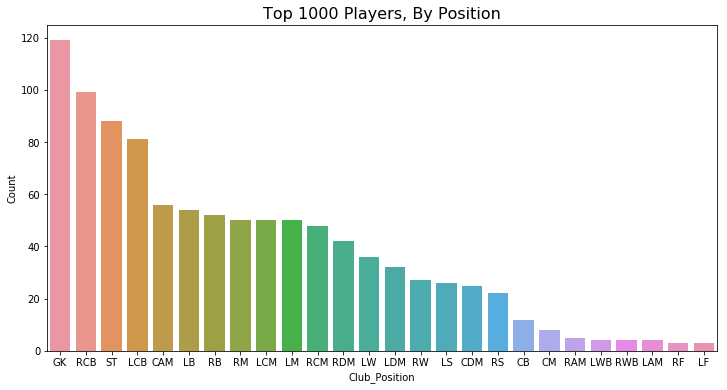

In [124]:
plt.figure(figsize=(12,6))
plt.title("Top 1000 Players, By Position", fontsize=16)
sns.barplot(data=by_position, x='Club_Position', y='Count')
plt.show()

Obsevations:
  - Goalkeepers (GK) are the most represented position among the top 1000 players.
  - Strikers (ST), at 3rd most represented, are the only offensive players in the top 12 positions.
  - The remaining 10 of the top 12 spots are split between defensive and midfield players.

## 2.2 How Many Defenders in Top 1000?

In [127]:
def1000 = new_top1000.copy()
def1000 = def1000[def1000['Club_Position'].isin(def_positions)]
res = def1000.Rating.count()
print("There are {} defenders among the top 1000 players.".format(res))

There are 306 defenders among the top 1000 players.


There are 3 main categories of positions in football: defensive, midfield, and offensive.  Subtracting the 119 Goalkeeprs found above, defensive players make up very close to 1/3 of the remaining top 1000 players.

# 3. Explore Defenders

## 3.1 Defenders by Position (Histogram)

Let's now take a look at the breakdown of total defensive players by position. Follow the same paradigm as player breakdown in Section 2.1: Group by position, get a count, sort descending, plot!

In [132]:
def_grouped = defenders.groupby(defenders['Club_Position']).count().reset_index()
def_grouped = def_grouped[['Club_Position','Rating']]
def_grouped = def_grouped.sort_values('Rating', ascending=False)
def_grouped.columns = ['Club_Position','Count']
def_grouped

,Club_Position,Count
5,RCB,633
2,LCB,631
1,LB,549
4,RB,548
0,CB,83
3,LWB,45
6,RWB,45


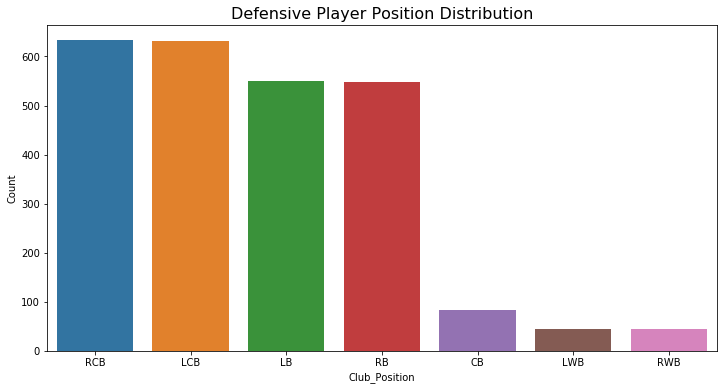

In [133]:
plt.figure(figsize=(12,6))
plt.title("Defensive Player Position Distribution", fontsize=16)
sns.barplot(data=def_grouped, x='Club_Position', y='Count')
plt.show()

Center Backs, Left Wingbacks, and Right Wingbacks have far fewer players listed than the other positions.  Perhaps this is due to differing nomenclature across the world for the same positions?

There is also undoubtedly overlap between the RCB, LCB, and CB in that Right and Left Center Backs surely fill in at Center Back from time to time.  Also, the positions names may change based on different formations being used throughout the course of a match.  This is getting out of depth of my football knowledge, let's proceed.

## 3.2 Defenders by Rating (Histogram)

Follow the (now familiar) group, count, sort, plot paradigm to get an idea of the ratings distribution for all defensive players.

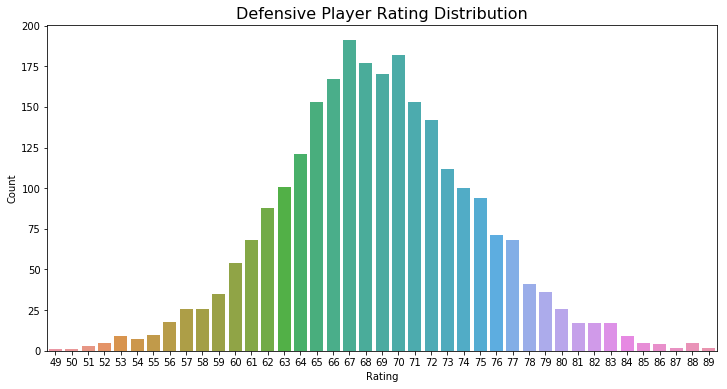

In [140]:
# group by rating, count, sort
def_by_rating = defenders.groupby(defenders['Rating']).count().reset_index()
def_by_rating = def_by_rating[['Club_Position','Rating']]
def_by_rating = def_by_rating.sort_values('Rating', ascending=False)
def_by_rating.columns = ['Count','Rating']

# plot rating distribution
plt.figure(figsize=(12,6))
plt.title("Defensive Player Rating Distribution", fontsize=16)
sns.barplot(data=def_by_rating, x='Rating', y='Count')
plt.show()

This result is about what you'd expect: many average ratings, with a few very low and very high ranked players.  The majority of the players are rated between 60 and 77.  Also looks like the data is fairly normally distributed.

# 4. Begin Defender Analysis

## 4.1 Selection of Attributes

Refine Attributes for Defenders

In [58]:
# get a list of all the columns
cols = fifa.columns.tolist()

#display all results in a more compact manner
for i,col in enumerate(cols):
    if i%5 ==0:
        print(" ") #new line
    print(col,"   ", end=" ") #do not go to new line after printing each item

 
Name     Nationality     National_Position     National_Kit     Club      
Club_Position     Club_Kit     Club_Joining     Contract_Expiry     Rating      
Height     Weight     Preffered_Foot     Birth_Date     Age      
Preffered_Position     Work_Rate     Weak_foot     Skill_Moves     Ball_Control      
Dribbling     Marking     Sliding_Tackle     Standing_Tackle     Aggression      
Reactions     Attacking_Position     Interceptions     Vision     Composure      
Crossing     Short_Pass     Long_Pass     Acceleration     Speed      
Stamina     Strength     Balance     Agility     Jumping      
Heading     Shot_Power     Finishing     Long_Shots     Curve      
Freekick_Accuracy     Penalties     Volleys     GK_Positioning     GK_Diving      
GK_Kicking     GK_Handling     GK_Reflexes     

Group Attributes By Category

## 4.2 Attributes vs. Rating, Visually

Correlation Heatmap

Scatter Plots

## 4.3 General Predictions

# 5. Reveal Key Attributes with Multiple Linear Regression

## 5.1 Null Hypothesis

## 5.2 Results from Regression

# 6. Predict Rating From Attributes with Machine Learning

## 6.1 Predictions with Train/Test Split

## 6.2 Refine and (Hopefully) Improve the Model with Cross Validation

# 7. Conclusions

## 7.1 Key Attributes

## 7.2 Prediction of Overall Rating